In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### **Creando las funciones y cargando la imagen**
---

In [48]:

def apply_padding(img, pad_width):
    return np.pad(img, pad_width=((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)

In [49]:
def apply_custom_kernel(og_img, kernel):
  # Para trabajar en los bordes, aplico el concepto de padding con valores = 0
  floor_div_padding = kernel.shape[0] // 2
  img = apply_padding(og_img, floor_div_padding)

  
  
  height = og_img.shape[0]
  width = og_img.shape[1]
  
  newImg = np.zeros((height, width, 3), dtype=np.uint8)
  
  for i in range(floor_div_padding, height + floor_div_padding):
    for j in range(floor_div_padding, width + floor_div_padding):
       for c in range(3):
          # Extraer la submatriz correspondiente al área del kernel
          submatrix = img[i-floor_div_padding:i+floor_div_padding+1, j-floor_div_padding:j+floor_div_padding+1, c]
          pixel_sum = np.sum(submatrix * kernel)
          newImg[i-floor_div_padding, j-floor_div_padding, c] = min(max(int(pixel_sum), 0), 255)
  
  return newImg

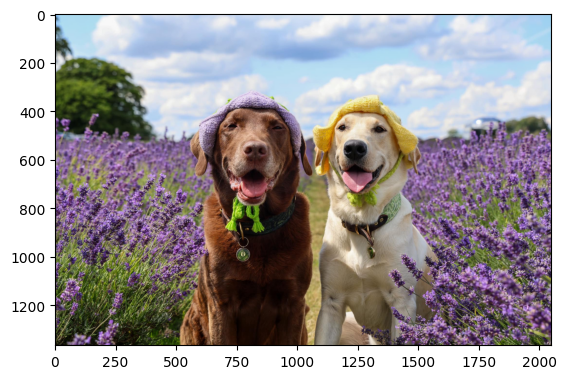

In [50]:
path_1 = './labs.jpg'

img_1 = cv2.cvtColor(cv2.imread(path_1), cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

### **Definiendo algunos filtros con distinto tamaño de Kernel**
---

In [51]:
# Blur
blur_3x3 = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

blur_7x7 = 1/49 * np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1]
])


# Sharpening
sharpen_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1,  2,  2,  2, -1],
    [-1,  2,  8,  2, -1],
    [-1,  2,  2,  2, -1],
    [-1, -1, -1, -1, -1]
])
sharpen_5x5 = sharpen_5x5 / np.sum(sharpen_5x5) 


sharpen_11x11 = np.array([
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1],
    [-1,  1,  2,  2,  2,  2,  2,  2,  2,  1, -1],
    [-1,  1,  2,  4,  4,  4,  4,  4,  2,  1, -1],
    [-1,  1,  2,  4,  8,  8,  8,  4,  2,  1, -1],
    [-1,  1,  2,  4,  8, 16,  8,  4,  2,  1, -1],
    [-1,  1,  2,  4,  8,  8,  8,  4,  2,  1, -1],
    [-1,  1,  2,  4,  4,  4,  4,  4,  2,  1, -1],
    [-1,  1,  2,  2,  2,  2,  2,  2,  2,  1, -1],
    [-1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
])
sharpen_11x11 = sharpen_11x11 / np.sum(sharpen_11x11)

# Sobel
sobel_x_5x5 = np.array([
    [-2, -1, 0,  1,  2],
    [-3, -2, 0,  2,  3],
    [-4, -3, 0,  3,  4],
    [-3, -2, 0,  2,  3],
    [-2, -1, 0,  1,  2]
])

sobel_x_7x7 = np.array([
    [-3, -2, -1, 0,  1,  2,  3],
    [-4, -3, -2, 0,  2,  3,  4],
    [-5, -4, -3, 0,  3,  4,  5],
    [-6, -5, -4, 0,  4,  5,  6],
    [-5, -4, -3, 0,  3,  4,  5],
    [-4, -3, -2, 0,  2,  3,  4],
    [-3, -2, -1, 0,  1,  2,  3]
])

# Laplaciano
laplacian_3x3 = np.array([
    [ 0,  1,  0],
    [ 1, -4,  1],
    [ 0,  1,  0]
])

laplacian_11x11 = np.array([
    [  0,   0,   0,   1,   1,   2,   1,   1,   0,   0,   0],
    [  0,   1,   1,   2,   2,   3,   2,   2,   1,   1,   0],
    [  0,   1,   2,   4,   4,   5,   4,   4,   2,   1,   0],
    [  1,   2,   4,   8,   8,  10,   8,   8,   4,   2,   1],
    [  1,   2,   4,   8,  16,  18,  16,   8,   4,   2,   1],
    [  2,   3,   5,  10,  18, -80,  18,  10,   5,   3,   2],
    [  1,   2,   4,   8,  16,  18,  16,   8,   4,   2,   1],
    [  1,   2,   4,   8,   8,  10,   8,   8,   4,   2,   1],
    [  0,   1,   2,   4,   4,   5,   4,   4,   2,   1,   0],
    [  0,   1,   1,   2,   2,   3,   2,   2,   1,   1,   0],
    [  0,   0,   0,   1,   1,   2,   1,   1,   0,   0,   0]
])



### **Poniendo a prueba los resultados y comparandolos vs funciones de OpenCV** 
---

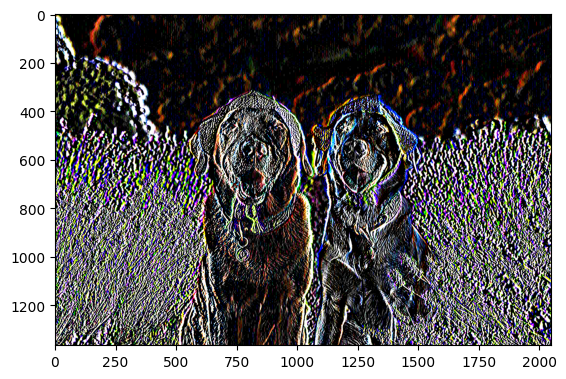

In [52]:
sobel_5 = apply_custom_kernel(img_1, sobel_x_5x5)
plt.imshow(sobel_5)

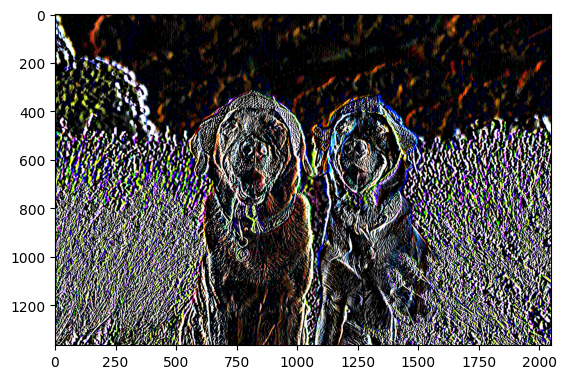

In [53]:
# Comparando con resultado de cv2

sobel_5_cv2 = cv2.filter2D(img_1, -1, sobel_x_5x5)
plt.imshow(sobel_5_cv2)

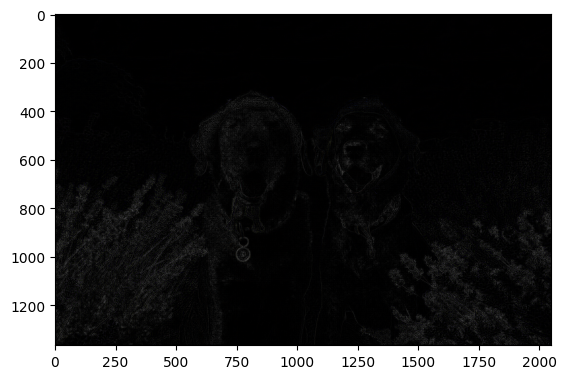

In [54]:
laplacian_3 = apply_custom_kernel(img_1, laplacian_3x3)
plt.imshow(laplacian_3)

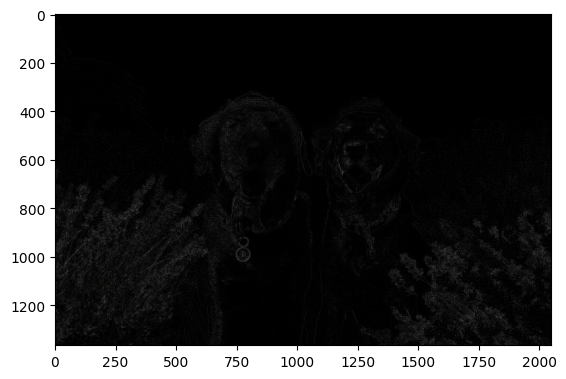

In [55]:
laplacian_3_cv2 = cv2.filter2D(img_1, -1, laplacian_3x3)
plt.imshow(laplacian_3_cv2)

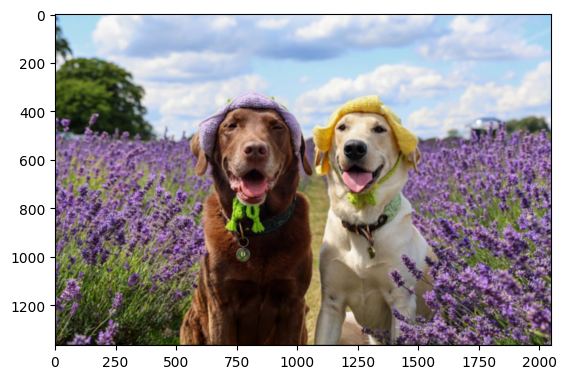

In [56]:
sharpen_11 = apply_custom_kernel(img_1, sharpen_11x11)
plt.imshow(sharpen_11)

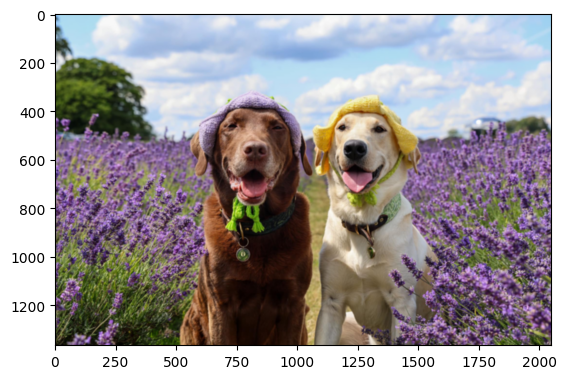

In [57]:
sharpen_11_cv2 = cv2.filter2D(img_1, -1, sharpen_11x11)
plt.imshow(sharpen_11_cv2)

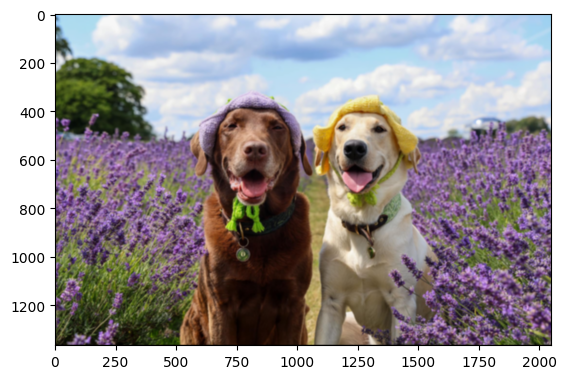

In [58]:
blur_7 = apply_custom_kernel(img_1, blur_7x7)
plt.imshow(blur_7)

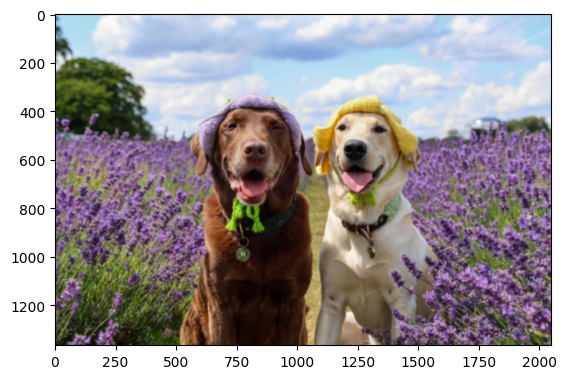

In [59]:
blur_7_cv2 = cv2.filter2D(img_1, -1, blur_7x7)
plt.imshow(blur_7_cv2)